<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
خوشه‌بندی رفتار مشتریان</font>
</h1>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
فرض کنید شما تحلیل‌گر داده یک فروشگاه آنلاین هستید. دیتاستی در اختیار دارید که اطلاعات مربوط به سفارشات مشتریان را در آن ثبت کرده‌اید. با استفاده از روش‌های خوشه‌بندی، مشتریان را بر اساس رفتار خریدشان خوشه‌بندی کنید.
</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    در فایل اولیه‌ی این سوال یک فایل با نام <code>orders.csv</code> قرار دارد.
    مجموعه‌داده‌ی این سوال شامل ۲۰۰٬۰۰۰ سطر و ۷ ستون است و
    توضیحات مربوط به ستون‌ها به شرح زیر است:
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazirmatn" size=3>

| ستون | توضیح |
|:------:|:-------:|
| `ID_Order` | شناسه یکتای هر سفارش است. هر ردیف جدول نماینده یک سفارش خاص است. |
| `ID_Customer` | شناسه یکتای مشتری است که سفارش را ثبت کرده است. ممکن است یک مشتری چند سفارش داشته باشد. |
| `ID_Item` | شناسه یکتای آیتم یا محصول سفارش‌داده‌شده. در واقع مشخص می‌کند چه محصولی در سفارش آمده است. |
| `DateTime_CartFinalize` | زمان نهایی‌سازی سبد خرید است، یعنی لحظه‌ای که سفارش نهایی شده. این ستون برای استخراج اطلاعات زمانی (مثلاً فصل خرید، ساعت روز، روز هفته) می‌تواند کاربردی باشد. |
| `Amount_Gross_Order` | مبلغ ناخالص سفارش به تومان یا هر واحد پولی دیگر. شامل کل هزینه سفارش (شاید بدون تخفیف یا مالیات). |
| `city_name_fa` | نام فارسی شهری که سفارش از آن ثبت شده. |
| `Quantity_item` | تعداد آیتم سفارش‌داده‌شده از آن محصول در سفارش. |

</font>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:500%; font-family:vazir; font-size:medium">
<font color="red" size=3><b color='red'>توجه:</b></font>
<font face="vazirmatn" size=3>
در این سوال هیچ مجموعه داده‌ای برای تست وجود ندارد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    در ابتدا نیاز است فایل مجموعه‌داده را بخوانید. تنها مجموعه داده تمرین، در فایل <code>orders.csv</code> ذخیره شده‌است.
</font>
</p>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

data_path = '/content/drive/MyDrive/Quera/4_Clustering/orders.csv'

# بارگذاری داده‌ها
df = pd.read_csv(data_path)
print("shape of dataset: ", df.shape)
print(df.head(7))

shape of dataset:  (200000, 7)
   ID_Order  ID_Customer  ID_Item    DateTime_CartFinalize  \
0   2714054       469662    21386  2015-10-15 08:50:56.000   
1  11104039      3063877   248497  2018-02-11 00:29:26.000   
2   4228130      3184893    50144  2016-06-14 00:30:08.000   
3  22225624      6888562    70208  2018-09-03 14:37:19.000   
4   4068771      2533490    67627  2016-05-21 11:51:02.000   
5  11479246      2841640   312932  2018-03-01 12:07:15.000   
6   8267421      5235886    42365  2017-08-19 13:30:24.000   

   Amount_Gross_Order city_name_fa  Quantity_item  
0            597982.0   محمود آباد            1.0  
1            980000.0       خرمدره            1.0  
2            229358.0         قرچک            1.0  
3             16514.0           قم            1.0  
4            133028.0        تهران            1.0  
5            290000.0         مشهد            1.0  
6             55046.0       اصفهان            1.0  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


In [4]:
df.describe()

ID_Order   ID_Customer       ID_Item  Amount_Gross_Order  \
count  2.000000e+05  2.000000e+05  2.000000e+05        2.000000e+05   
mean   9.871963e+06  2.860671e+06  3.757313e+05        1.458204e+06   
std    6.404275e+06  1.921815e+06  3.948462e+05        5.450972e+06   
min    1.000411e+06  4.661320e+05  7.600000e+01        0.000000e+00   
25%    5.022253e+06  1.021053e+06  8.955725e+04        1.212730e+05   
50%    8.591270e+06  2.895180e+06  2.302210e+05        3.211010e+05   
75%    1.246037e+07  4.179218e+06  5.192668e+05        1.011032e+06   
max    2.484656e+07  7.282118e+06  2.093722e+06        1.530000e+09   

       Quantity_item  
count  200000.000000  
mean        1.261225  
std         1.801186  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max       500.000000

In [5]:
df.isna().sum()

ID_Order                 0
ID_Customer              0
ID_Item                  0
DateTime_CartFinalize    0
Amount_Gross_Order       0
city_name_fa             0
Quantity_item            0
dtype: int64

In [6]:
df['DateTime_CartFinalize'] = pd.to_datetime(df['DateTime_CartFinalize'])

# =============================
# 📦 سفارش‌ها (orders_df)
# =============================
orders_df = df.drop_duplicates(subset='ID_Order').copy()

orders_df['Order_Hour'] = orders_df['DateTime_CartFinalize'].dt.hour
orders_df['Order_DayOfWeek'] = orders_df['DateTime_CartFinalize'].dt.dayofweek
orders_df['Order_Month'] = orders_df['DateTime_CartFinalize'].dt.month
orders_df['Order_Week'] = df['DateTime_CartFinalize'].dt.isocalendar().week
orders_df['Order_Season'] = orders_df['Order_Month'] % 12 // 3 + 1

# افزودن City_ID به سفارش‌ها
location_df = df.groupby('city_name_fa').agg({
    'ID_Order': pd.Series.nunique,
    'ID_Customer': pd.Series.nunique,
    'Amount_Gross_Order': 'sum'
}).reset_index().rename(columns={
    'ID_Order': 'Total_Orders',
    'ID_Customer': 'Unique_Customers',
    'Amount_Gross_Order': 'Total_Revenue'
})
location_df['City_ID'] = location_df.index
location_df['Avg_Revenue_per_Order'] = location_df['Total_Revenue'] / location_df['Total_Orders']
location_df['Avg_Revenue_per_Customer'] = location_df['Total_Revenue'] / location_df['Unique_Customers']

orders_df = orders_df.merge(location_df[['city_name_fa', 'City_ID']], on='city_name_fa', how='left')

# =============================
# 🧾 آیتم‌های سفارش (order_items_df)
# =============================
df['Total_Item_Price'] = df['Amount_Gross_Order'] * df['Quantity_item']
df['Unit_Price'] = df['Total_Item_Price'] / df['Quantity_item']

order_items_df = df[['ID_Order', 'ID_Item', 'Quantity_item', 'Total_Item_Price', 'Unit_Price']].copy()

# محاسبه تعداد آیتم‌ها و مجموع تعداد برای هر سفارش
item_summary = df.groupby('ID_Order').agg(
    Num_Items_in_Order=('ID_Item', 'nunique'),
    Total_Quantity_in_Order=('Quantity_item', 'sum')
).reset_index()

orders_df = orders_df.merge(item_summary, on='ID_Order', how='left')

# =============================
# 👤 مشتری‌ها (customer_df)
# =============================
snapshot_date = df['DateTime_CartFinalize'].max()

customer_full_df = df.groupby('ID_Customer').agg({
    'ID_Order': pd.Series.nunique,
    'Amount_Gross_Order': 'sum',
    'DateTime_CartFinalize': ['max', 'min']
})

customer_full_df.columns = ['Frequency', 'Monetary', 'Last_Order_Date', 'First_Order_Date']
customer_full_df = customer_full_df.reset_index()

customer_full_df['Recency'] = (snapshot_date - customer_full_df['Last_Order_Date']).dt.days
customer_full_df['Customer_Lifetime'] = (
    customer_full_df['Last_Order_Date'] - customer_full_df['First_Order_Date']
).dt.days
customer_full_df['Avg_Order_Amount'] = customer_full_df['Monetary'] / customer_full_df['Frequency']

customer_df = customer_full_df[[
    'ID_Customer', 'Recency', 'Frequency', 'Monetary',
    'Avg_Order_Amount', 'Customer_Lifetime'
]]

In [7]:
customer_df.head()

ID_Customer  Recency  Frequency    Monetary  Avg_Order_Amount  \
0       466132        8         10  35356058.0      3.535606e+06   
1       466136      444          1    306963.0      3.069630e+05   
2       466141      637          3   1324312.0      4.414373e+05   
3       466146     1023          1    302752.0      3.027520e+05   
4       466152       98          3   1173027.0      3.910090e+05   

   Customer_Lifetime  
0               1797  
1                  0  
2                358  
3                  0  
4               1154

In [8]:
order_items_df.head()

ID_Order  ID_Item  Quantity_item  Total_Item_Price  Unit_Price
0   2714054    21386            1.0          597982.0    597982.0
1  11104039   248497            1.0          980000.0    980000.0
2   4228130    50144            1.0          229358.0    229358.0
3  22225624    70208            1.0           16514.0     16514.0
4   4068771    67627            1.0          133028.0    133028.0

In [9]:
orders_df.head()

ID_Order  ID_Customer  ID_Item DateTime_CartFinalize  Amount_Gross_Order  \
0   2714054       469662    21386   2015-10-15 08:50:56            597982.0   
1  11104039      3063877   248497   2018-02-11 00:29:26            980000.0   
2   4228130      3184893    50144   2016-06-14 00:30:08            229358.0   
3  22225624      6888562    70208   2018-09-03 14:37:19             16514.0   
4   4068771      2533490    67627   2016-05-21 11:51:02            133028.0   

  city_name_fa  Quantity_item  Order_Hour  Order_DayOfWeek  Order_Month  \
0   محمود آباد            1.0           8                3           10   
1       خرمدره            1.0           0                6            2   
2         قرچک            1.0           0                1            6   
3           قم            1.0          14                0            9   
4        تهران            1.0          11                5            5   

   Order_Week  Order_Season  City_ID  Num_Items_in_Order  \
0          42             4      638                   1   
1           6             1      262                   1   
2          24             3      582                   1   
3          36             4      593                   1   
4          20             2      215                   1   

   Total_Quantity_in_Order  
0                      1.0  
1                      1.0  
2                      1.0  
3                      1.0  
4                      1.0

In [10]:
location_df.head()

city_name_fa  Total_Orders  Unique_Customers  Total_Revenue  City_ID  \
0        آب بر            15                14     20903542.0        0   
1       آبادان           401               320    557917848.0        1   
2        آباده            71                48    253235453.0        2   
3    آباده طشک             3                 3     39179359.0        3   
4        آبدان             2                 2      7838532.0        4   

   Avg_Revenue_per_Order  Avg_Revenue_per_Customer  
0           1.393569e+06              1.493110e+06  
1           1.391316e+06              1.743493e+06  
2           3.566697e+06              5.275739e+06  
3           1.305979e+07              1.305979e+07  
4           3.919266e+06              3.919266e+06

In [11]:
print("location_df: ", location_df.shape)
print("orders_df: ", orders_df.shape)
print("order_items_df: ", order_items_df.shape)
print("customer_df: ", customer_df.shape)

location_df:  (906, 7)
orders_df:  (197631, 15)
order_items_df:  (200000, 5)
customer_df:  (151634, 6)


In [12]:
print("orders_df dtypes:\n", orders_df.dtypes, "\n\n")
print("order_items_df dtypes:\n", order_items_df.dtypes, "\n\n")
print("customer_df dtypes:\n", customer_df.dtypes, "\n\n")
print("location_df dtypes:\n", location_df.dtypes)


orders_df dtypes:
 ID_Order                            int64
ID_Customer                         int64
ID_Item                             int64
DateTime_CartFinalize      datetime64[ns]
Amount_Gross_Order                float64
city_name_fa                       object
Quantity_item                     float64
Order_Hour                          int32
Order_DayOfWeek                     int32
Order_Month                         int32
Order_Week                         UInt32
Order_Season                        int32
City_ID                             int64
Num_Items_in_Order                  int64
Total_Quantity_in_Order           float64
dtype: object 


order_items_df dtypes:
 ID_Order              int64
ID_Item               int64
Quantity_item       float64
Total_Item_Price    float64
Unit_Price          float64
dtype: object 


customer_df dtypes:
 ID_Customer            int64
Recency                int64
Frequency              int64
Monetary             float64
Avg_Order_Amount

In [13]:
print("orders_df nulls:\n", orders_df.isnull().sum(), "\n\n")
print("order_items_df nulls:\n", order_items_df.isnull().sum(), "\n\n")
print("customer_df nulls:\n", customer_df.isnull().sum(), "\n\n")
print("location_df nulls:\n", location_df.isnull().sum(), "\n\n")

orders_df nulls:
 ID_Order                   0
ID_Customer                0
ID_Item                    0
DateTime_CartFinalize      0
Amount_Gross_Order         0
city_name_fa               0
Quantity_item              0
Order_Hour                 0
Order_DayOfWeek            0
Order_Month                0
Order_Week                 0
Order_Season               0
City_ID                    0
Num_Items_in_Order         0
Total_Quantity_in_Order    0
dtype: int64 


order_items_df nulls:
 ID_Order            0
ID_Item             0
Quantity_item       0
Total_Item_Price    0
Unit_Price          0
dtype: int64 


customer_df nulls:
 ID_Customer          0
Recency              0
Frequency            0
Monetary             0
Avg_Order_Amount     0
Customer_Lifetime    0
dtype: int64 


location_df nulls:
 city_name_fa                0
Total_Orders                0
Unique_Customers            0
Total_Revenue               0
City_ID                     0
Avg_Revenue_per_Order       0
Avg_Reve

In [14]:
print("Unique customers:", df['ID_Customer'].nunique(), "\n")
print("Unique orders:", df['ID_Order'].nunique(), "\n")
print("Unique items:", df['ID_Item'].nunique(), "\n")

Unique customers: 151634 

Unique orders: 197631 

Unique items: 95232 




Customers with more than 1 order:
count        30.000000
mean       5054.466667
std       22745.569445
min           1.000000
25%           1.000000
50%           6.500000
75%         129.500000
max      124098.000000
Name: Customer_Frequency, dtype: float64


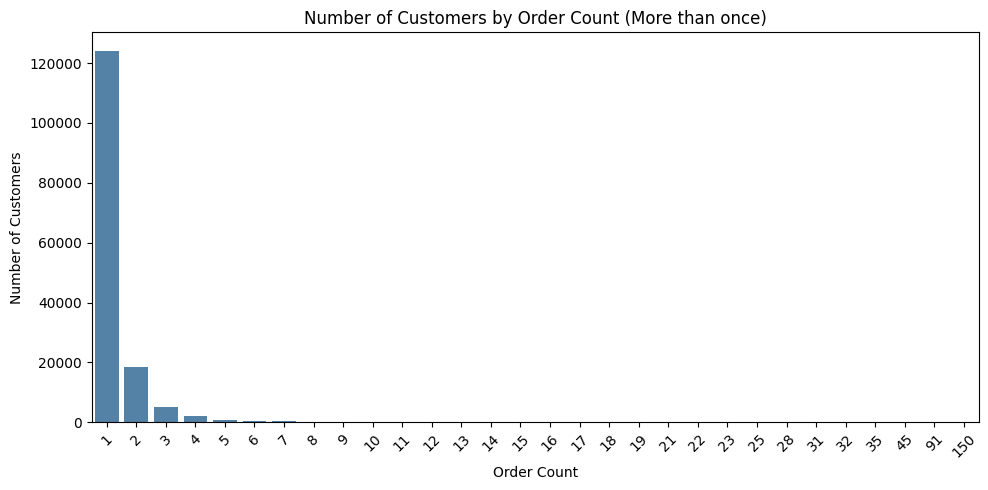

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

order_counts_series = df.groupby('ID_Customer')['ID_Order'].nunique()
order_counts = order_counts_series.value_counts().sort_index().to_frame(name='Customer_Frequency')
order_counts.index.name = 'Order_Count'

print("\nCustomers with more than 1 order:")
print(order_counts['Customer_Frequency'].describe())

# Bar chart
plt.figure(figsize=(10, 5))
sns.barplot(
    data=order_counts.reset_index(),
    x='Order_Count',
    y='Customer_Frequency',
    color='steelblue'
)
plt.title("Number of Customers by Order Count (More than once)")
plt.xlabel("Order Count")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pie Chart — Single vs Multi-order Customers


In [16]:
multi_order_count = (order_counts_series > 1).sum()
total_customers = order_counts_series.shape[0]

print(f"📌 تعداد مشتری‌هایی که بیش از یک بار خرید کرده‌اند: {multi_order_count}")
print(f"📊 درصد نسبت به کل مشتری‌ها: {100 * multi_order_count / total_customers:.2f}%")

📌 تعداد مشتری‌هایی که بیش از یک بار خرید کرده‌اند: 27536
📊 درصد نسبت به کل مشتری‌ها: 18.16%


Text(0.5, 1.0, 'Customer Distribution: Single vs Multiple Orders')

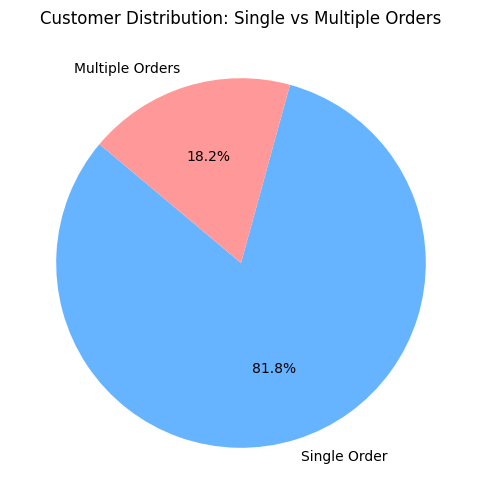

In [17]:
single_count = (order_counts_series == 1).sum()
multi_count = (order_counts_series > 1).sum()

plt.figure(figsize=(6, 6))
plt.pie([single_count, multi_count],
        labels=['Single Order', 'Multiple Orders'],
        autopct='%1.1f%%',
        colors=['#66b3ff', '#ff9999'],
        startangle=140)
plt.title("Customer Distribution: Single vs Multiple Orders")


💰 Total Monetary (Single Buyers): 205,030,940,389
💰 Total Monetary (Multi Buyers): 86,609,868,374
📊 Average Purchase (Single): 1,652,170
📊 Average Purchase (Multi): 3,145,332


<ipython-input-18-875ce43d4453>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Single Buyers', 'Multi Buyers'], y=[total_single, total_multi], palette='Set2')


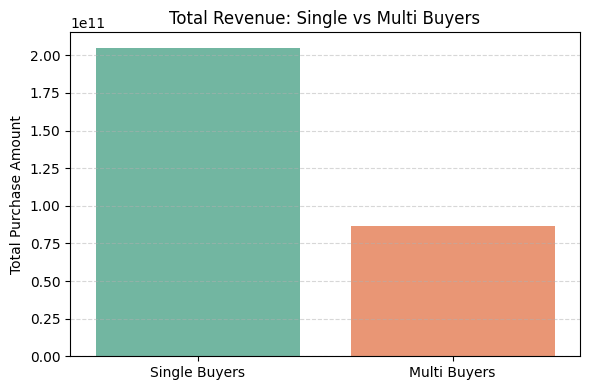

In [18]:
# گام 1: تفکیک مشتریان
single_buyers = customer_df[customer_df['Frequency'] == 1]
multi_buyers = customer_df[customer_df['Frequency'] > 1]

# گام 2: آماره‌های فروش
total_single = single_buyers['Monetary'].sum()
total_multi = multi_buyers['Monetary'].sum()

mean_single = single_buyers['Monetary'].mean()
mean_multi = multi_buyers['Monetary'].mean()

print(f"💰 Total Monetary (Single Buyers): {total_single:,.0f}")
print(f"💰 Total Monetary (Multi Buyers): {total_multi:,.0f}")
print(f"📊 Average Purchase (Single): {mean_single:,.0f}")
print(f"📊 Average Purchase (Multi): {mean_multi:,.0f}")

# گام 3: Bar chart مقایسه‌ای
plt.figure(figsize=(6, 4))
sns.barplot(x=['Single Buyers', 'Multi Buyers'], y=[total_single, total_multi], palette='Set2')
plt.title('Total Revenue: Single vs Multi Buyers')
plt.ylabel('Total Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

In [19]:
customer_df['Monetary'].describe()

count    1.516340e+05
mean     1.923321e+06
std      6.710459e+06
min      0.000000e+00
25%      1.733940e+05
50%      4.884630e+05
75%      1.504587e+06
max      1.530359e+09
Name: Monetary, dtype: float64

In [20]:
zero_monetary_customers = customer_df[customer_df['Monetary'] == 0]
print(zero_monetary_customers)
print("تعداد مشتری با خرید صفر:", zero_monetary_customers.shape[0])

       ID_Customer  Recency  Frequency  Monetary  Avg_Order_Amount  \
91833      3569947     1022          1       0.0               0.0   
91875      3571254     1025          1       0.0               0.0   
93909      3635876      953          1       0.0               0.0   

       Customer_Lifetime  
91833                  0  
91875                  0  
93909                  0  
تعداد مشتری با خرید صفر: 3


In [21]:
zero_ids = zero_monetary_customers['ID_Customer'].unique()
df[df['ID_Customer'].isin(zero_ids)].sort_values(by='ID_Customer')

# حذف مشتریانی با مبلغ خرید صفر
customer_df = customer_df[customer_df['Monetary'] > 0]

# فیلتر سایر جداول
orders_df = orders_df[~orders_df['ID_Customer'].isin(zero_ids)]
order_items_df = order_items_df[order_items_df['ID_Order'].isin(orders_df['ID_Order'])]

In [22]:
import plotly.express as px

fig1 = px.box(
    customer_df,
    y='Monetary',
    points='all',
    title='Boxplot of Monetary (with Outliers)',
    labels={'Monetary': 'Total Purchase Amount'},
    template='plotly_white'
)
fig1.show()

In [23]:
customer_df['Monetary_log'] = customer_df['Monetary'].apply(lambda x: np.log1p(x))

fig2 = px.histogram(
    customer_df,
    x='Monetary_log',
    nbins=100,
    title='Log1p Distribution of Monetary (log(1 + x))',
    template='plotly_white'
)
fig2.update_layout(bargap=0.05)
fig2.show()


In [24]:
single_buyers = customer_df[customer_df['Frequency'] == 1]
multi_buyers = customer_df[customer_df['Frequency'] > 1]

<ipython-input-25-b7e11c752eff>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




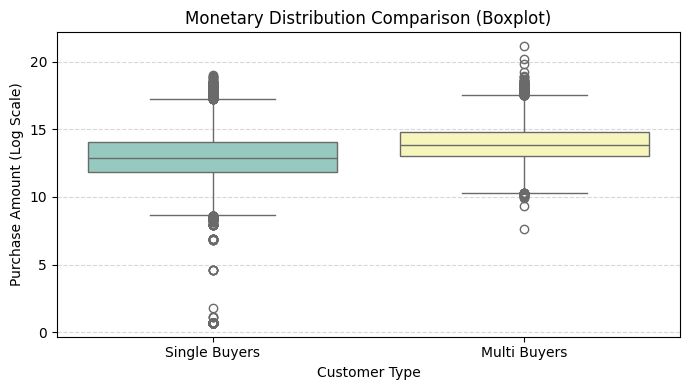

In [25]:
# Create DataFrame for plotting
df_boxplot = pd.DataFrame({
    'Monetary_log': np.concatenate([single_buyers['Monetary_log'], multi_buyers['Monetary_log']]),
    'Group': ['Single Buyers'] * len(single_buyers) + ['Multi Buyers'] * len(multi_buyers)
})

# Plotting the combined boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(x='Group', y='Monetary_log', data=df_boxplot, palette='Set3')

# Adding title and labels
plt.title('Monetary Distribution Comparison (Boxplot)')
plt.xlabel('Customer Type')
plt.ylabel('Purchase Amount (Log Scale)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

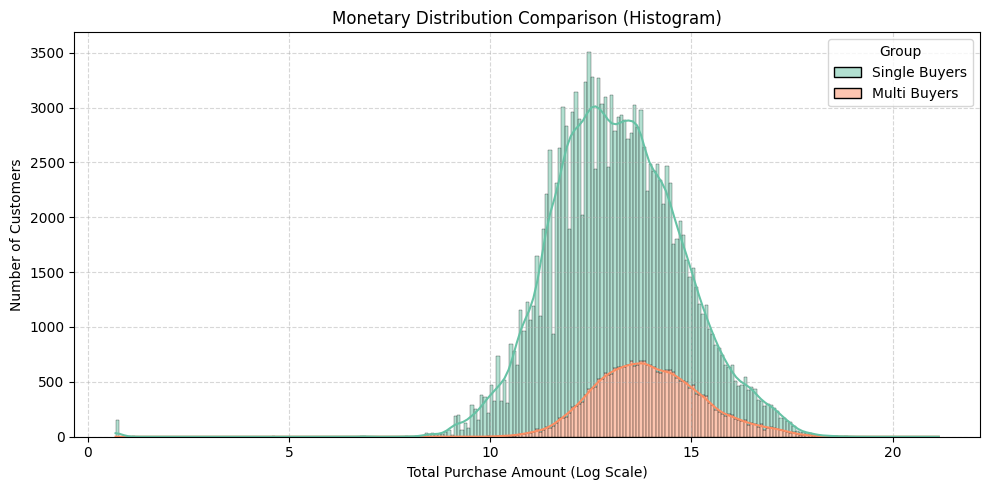

In [26]:
# Create DataFrame for plotting
df_histogram = pd.DataFrame({
    'Monetary_log': np.concatenate([single_buyers['Monetary_log'], multi_buyers['Monetary_log']]),
    'Group': ['Single Buyers'] * len(single_buyers) + ['Multi Buyers'] * len(multi_buyers)
})

# Plotting the combined histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_histogram, x='Monetary_log', hue='Group', multiple='stack', kde=True, palette='Set2')

# Adding title and labels
plt.title('Monetary Distribution Comparison (Histogram)')
plt.xlabel('Total Purchase Amount (Log Scale)')
plt.ylabel('Number of Customers')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-27-9625772b282b>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




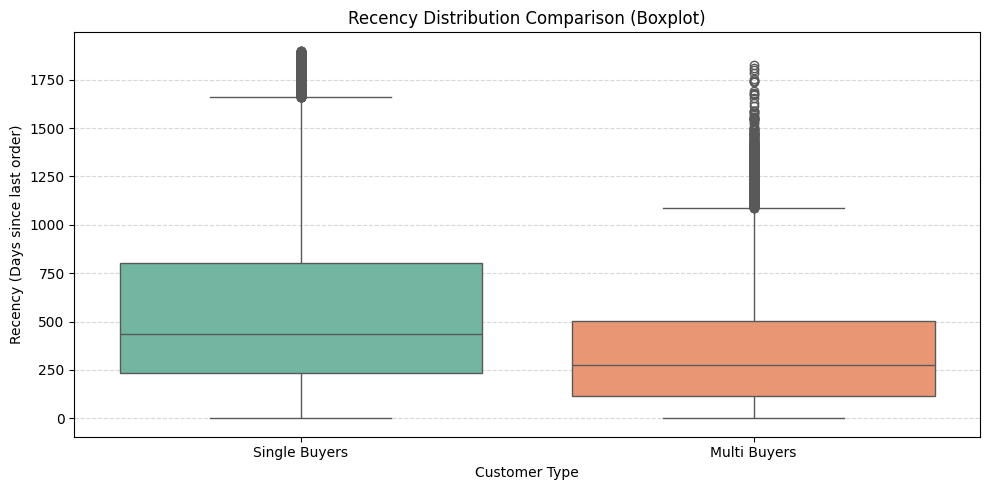

In [27]:
# ایجاد DataFrame برای Recency
df_recency = pd.DataFrame({
    'Recency': np.concatenate([
        single_buyers['Recency'],
        multi_buyers['Recency']
    ]),
    'Group': ['Single Buyers'] * len(single_buyers) + ['Multi Buyers'] * len(multi_buyers)
})

# ایجاد DataFrame برای Frequency
df_frequency = pd.DataFrame({
    'Frequency': np.concatenate([
        single_buyers['Frequency'],
        multi_buyers['Frequency']
    ]),
    'Group': ['Single Buyers'] * len(single_buyers) + ['Multi Buyers'] * len(multi_buyers)
})

# رسم Boxplot برای Recency
plt.figure(figsize=(10, 5))
sns.boxplot(x='Group', y='Recency', data=df_recency, palette='Set2')
plt.title('Recency Distribution Comparison (Boxplot)')
plt.xlabel('Customer Type')
plt.ylabel('Recency (Days since last order)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 🎯 هدف
بررسی کنیم آیا الگوهای زمانی خرید در مشتریان تک‌سفارشی و چندسفارشی تفاوت داره یا نه؟

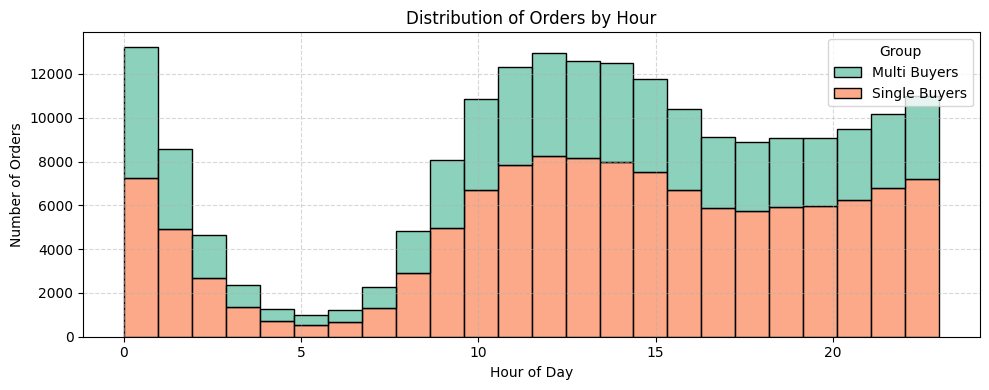

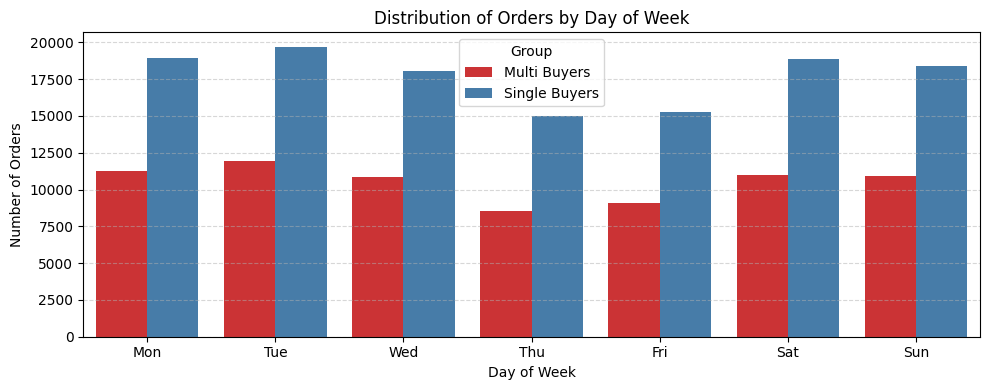

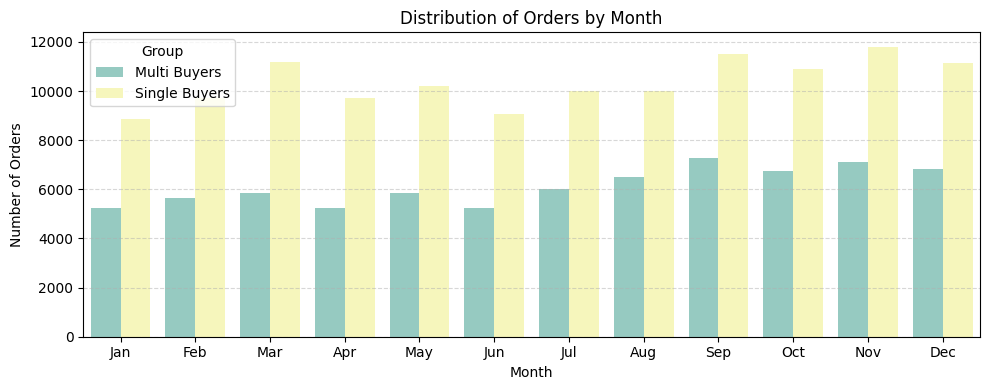

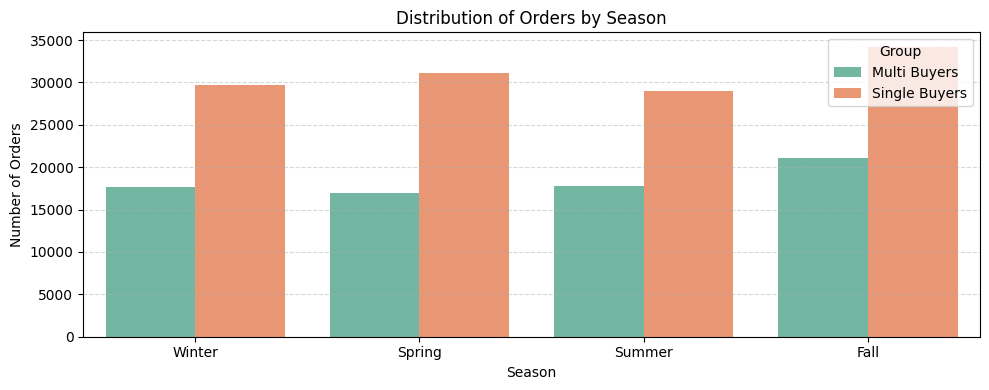

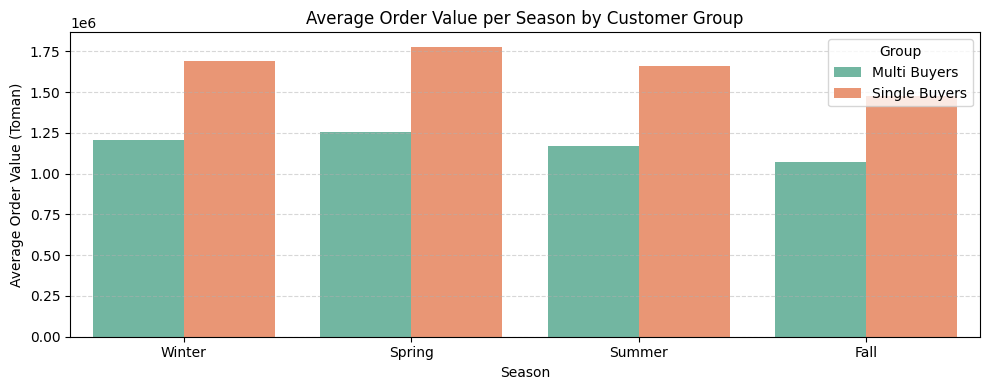

Season_Name          Group  Amount_Gross_Order
0        Fall   Multi Buyers        1.071981e+06
1        Fall  Single Buyers        1.478415e+06
2      Spring   Multi Buyers        1.255296e+06
3      Spring  Single Buyers        1.777214e+06
4      Summer   Multi Buyers        1.167096e+06
5      Summer  Single Buyers        1.657826e+06
6      Winter   Multi Buyers        1.207744e+06
7      Winter  Single Buyers        1.689981e+06

In [28]:
# گام 1: برچسب‌گذاری مشتری‌ها به عنوان Single یا Multi
customer_df['Group'] = np.where(customer_df['Frequency'] == 1, 'Single Buyers', 'Multi Buyers')

# اتصال orders_df به Group مشتری
orders_merged = orders_df.merge(customer_df[['ID_Customer', 'Group']], on='ID_Customer', how='left')

# گام 2: رسم توزیع ساعت سفارش‌ها
plt.figure(figsize=(10, 4))
sns.histplot(data=orders_merged, x='Order_Hour', hue='Group', multiple='stack', bins=24, palette='Set2')
plt.title("Distribution of Orders by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# تبدیل اعداد روز هفته به نام‌های واقعی
orders_merged['Order_DayOfWeek'] = orders_merged['Order_DayOfWeek'].map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})

# تبدیل شماره ماه به نام ماه
orders_merged['Order_Month'] = orders_merged['Order_Month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

plt.figure(figsize=(10, 4))
sns.countplot(data=orders_merged, x='Order_DayOfWeek', hue='Group', palette='Set1',
              order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("Distribution of Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=orders_merged, x='Order_Month', hue='Group', palette='Set3',
              order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Distribution of Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
orders_merged['Season_Name'] = orders_merged['Order_Season'].map(season_map)

# رسم نمودار countplot
plt.figure(figsize=(10, 4))
sns.countplot(data=orders_merged, x='Season_Name', hue='Group', palette='Set2',
              order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Distribution of Orders by Season')
plt.xlabel('Season')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Calculate average order value per season by group
seasonal_trend = orders_merged.groupby(['Season_Name', 'Group'])['Amount_Gross_Order'].mean().reset_index()

# Order the seasons for correct display
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(data=seasonal_trend, x='Season_Name', y='Amount_Gross_Order', hue='Group', order=season_order, palette='Set2')
plt.title('Average Order Value per Season by Customer Group')
plt.xlabel('Season')
plt.ylabel('Average Order Value (Toman)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

seasonal_trend.sort_values(by=['Season_Name', 'Group'])

## Heatmap توزیع سفارش‌ها در هفته و ساعت


In [29]:
orders_merged

ID_Order  ID_Customer  ID_Item DateTime_CartFinalize  \
0        2714054       469662    21386   2015-10-15 08:50:56   
1       11104039      3063877   248497   2018-02-11 00:29:26   
2        4228130      3184893    50144   2016-06-14 00:30:08   
3       22225624      6888562    70208   2018-09-03 14:37:19   
4        4068771      2533490    67627   2016-05-21 11:51:02   
...          ...          ...      ...                   ...   
197623  12172771      4403268   445940   2018-04-03 12:07:01   
197624   4425393      3745774   131645   2016-07-09 19:14:09   
197625   6671889      4845514   215045   2017-03-08 23:47:06   
197626   6315995      2541418   264021   2017-02-08 14:59:39   
197627   7584127      1342585    89427   2017-06-17 10:08:06   

        Amount_Gross_Order city_name_fa  Quantity_item  Order_Hour  \
0                 597982.0   محمود آباد            1.0           8   
1                 980000.0       خرمدره            1.0           0   
2                 229358.0         قرچک            1.0           0   
3                  16514.0           قم            1.0          14   
4                 133028.0        تهران            1.0          11   
...                    ...          ...            ...         ...   
197623            344037.0        تهران            2.0          12   
197624            600000.0       محمدیه            1.0          19   
197625            450000.0       اصفهان            1.0          23   
197626            193486.0        همدان            1.0          14   
197627             55046.0   بندر انزلی            1.0          10   

       Order_DayOfWeek Order_Month  Order_Week  Order_Season  City_ID  \
0                  Thu         Oct          42             4      638   
1                  Sun         Feb           6             1      262   
2                  Tue         Jun          24             3      582   
3                  Mon         Sep          36             4      593   
4                  Sat         May          20             2      215   
...                ...         ...         ...           ...      ...   
197623             Tue         Apr          14             2      215   
197624             Sat         Jul          27             3      637   
197625             Wed         Mar          10             2       76   
197626             Wed         Feb           6             1      744   
197627             Sat         Jun          24             3      158   

        Num_Items_in_Order  Total_Quantity_in_Order          Group Season_Name  
0                        1                      1.0   Multi Buyers        Fall  
1                        1                      1.0  Single Buyers      Winter  
2                        1                      1.0   Multi Buyers      Summer  
3                        1                      1.0  Single Buyers        Fall  
4                        1                      1.0  Single Buyers      Spring  
...                    ...                      ...            ...         ...  
197623                   1                      2.0  Single Buyers      Spring  
197624                   1                      1.0  Single Buyers      Summer  
197625                   1                      1.0  Single Buyers      Spring  
197626                   1                      1.0   Multi Buyers      Winter  
197627                   1                      1.0   Multi Buyers      Summer  

[197628 rows x 17 columns]

<Axes: xlabel='Order_Hour', ylabel='Order_DayOfWeek'>

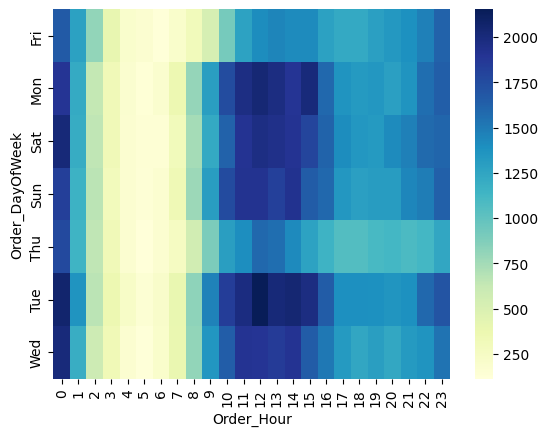

In [30]:
heat_data_WH = orders_merged.pivot_table(index='Order_DayOfWeek', columns='Order_Hour', values='ID_Order', aggfunc='count')
sns.heatmap(heat_data_WH, cmap='YlGnBu')

<Axes: xlabel='Order_Month', ylabel='Order_Day'>

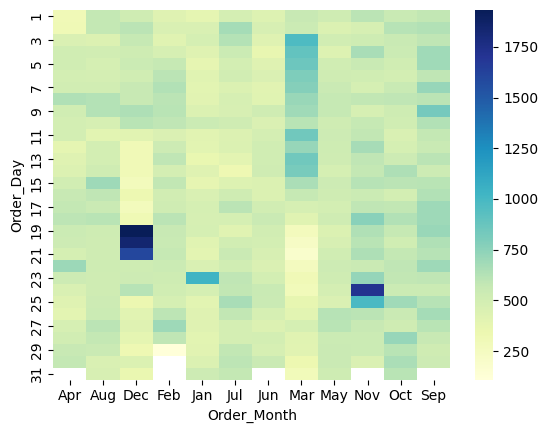

In [31]:
orders_merged['Order_Day'] = orders_merged['DateTime_CartFinalize'].dt.day

heat_data_SM = orders_merged.pivot_table(index='Order_Day', columns='Order_Month', values='ID_Order', aggfunc='count')
sns.heatmap(heat_data_SM, cmap='YlGnBu')

<Axes: xlabel='Order_Day', ylabel='count'>

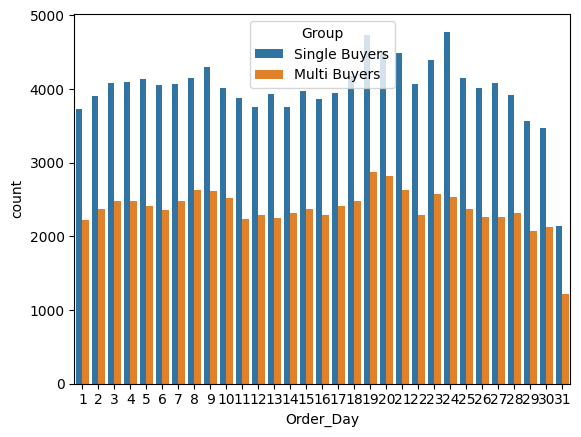

In [32]:
sns.countplot(data=orders_merged, x='Order_Day', hue='Group')

## فاصله زمانی بین سفارش‌ها

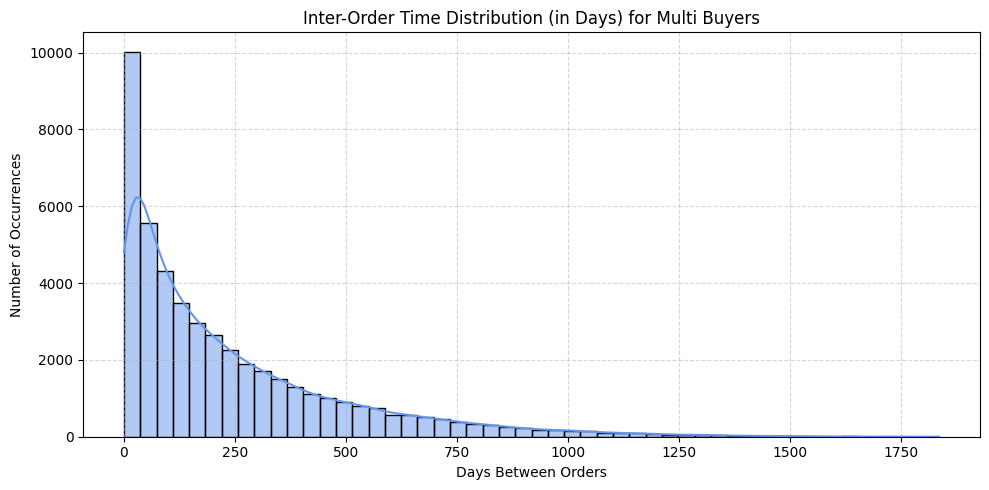

count    47183.000000
mean       238.883772
std        259.145479
min          0.000000
25%         47.000000
50%        149.000000
75%        343.000000
max       1836.000000
Name: Inter_Order_Days, dtype: float64

In [33]:
# Step 1: فاصله زمانی بین سفارش‌ها برای مشتری‌های چندبار‌خرید
# فیلتر مشتریانی که بیش از یک سفارش دارند
multi_order_df = df[df['ID_Customer'].isin(customer_df[customer_df['Frequency'] > 1]['ID_Customer'])]

# مرتب‌سازی بر اساس مشتری و زمان سفارش
multi_order_df = multi_order_df.sort_values(by=['ID_Customer', 'DateTime_CartFinalize'])

# محاسبه فاصله زمانی بین سفارش‌ها برای هر مشتری
multi_order_df['Inter_Order_Days'] = multi_order_df.groupby('ID_Customer')['DateTime_CartFinalize'].diff().dt.days

# حذف فاصله‌های NaN (اولین سفارش هر مشتری)
inter_order_days = multi_order_df['Inter_Order_Days'].dropna()

# نمایش آماره‌ها
inter_order_stats = inter_order_days.describe()

# رسم هیستوگرام فاصله بین سفارش‌ها
plt.figure(figsize=(10, 5))
sns.histplot(inter_order_days, bins=50, color='cornflowerblue', kde=True)
plt.title('Inter-Order Time Distribution (in Days) for Multi Buyers')
plt.xlabel('Days Between Orders')
plt.ylabel('Number of Occurrences')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

inter_order_stats

## Create a time trend of number of orders per month

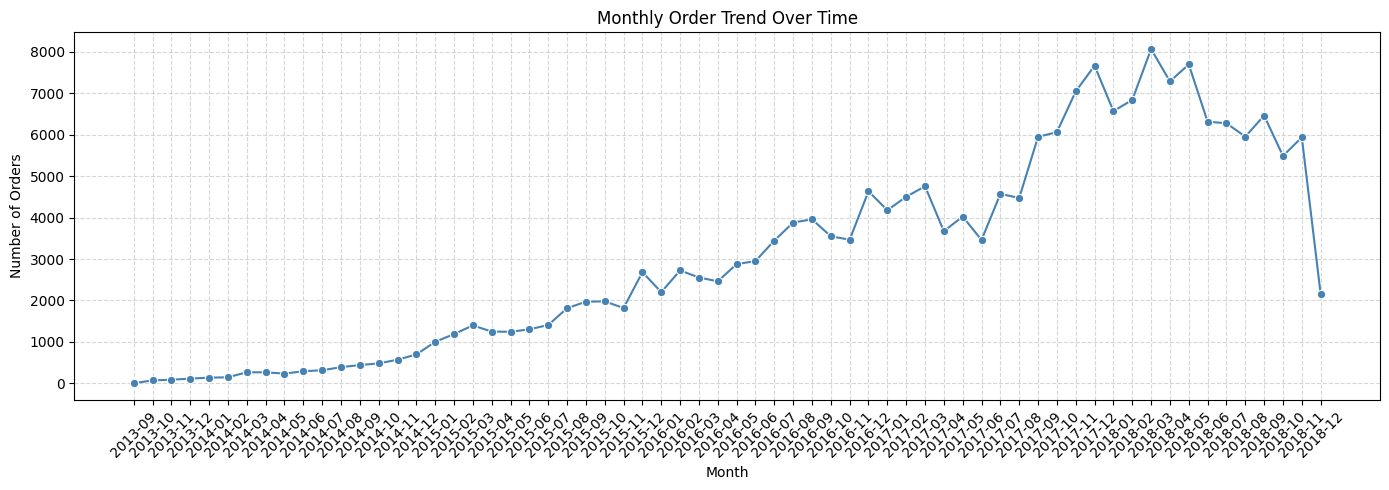

Month  Order_Count
59  2018-08         5950
60  2018-09         6458
61  2018-10         5485
62  2018-11         5933
63  2018-12         2154

In [34]:
# Extract year-month for trend analysis
df['Order_YearMonth'] = df['DateTime_CartFinalize'].dt.to_period('M').astype(str)

# Count number of orders per month
monthly_order_trend = df.groupby('Order_YearMonth')['ID_Order'].nunique().reset_index()
monthly_order_trend.columns = ['Month', 'Order_Count']

# Plot trend line
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_order_trend, x='Month', y='Order_Count', marker='o', color='steelblue')
plt.title('Monthly Order Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

monthly_order_trend.tail()

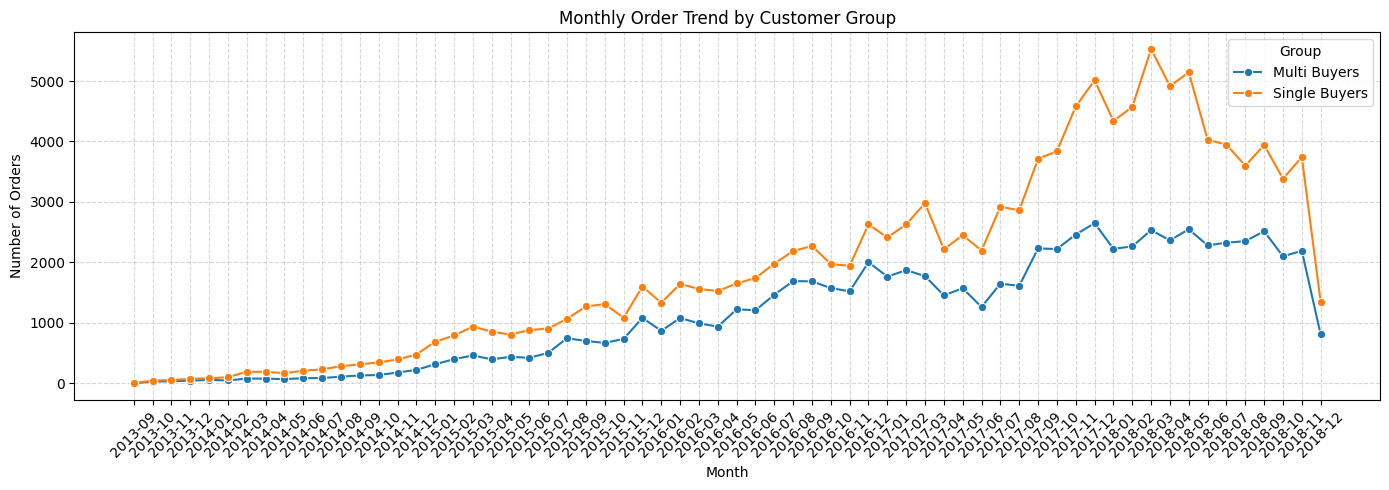

In [35]:
# Merge order data with customer group info
orders_with_group = df.merge(customer_df[['ID_Customer', 'Group']], on='ID_Customer', how='left')

# Extract Year-Month from datetime
orders_with_group['Order_YearMonth'] = orders_with_group['DateTime_CartFinalize'].dt.to_period('M').astype(str)

# Group by YearMonth and Group to count number of orders
monthly_group_trend = orders_with_group.groupby(['Order_YearMonth', 'Group'])['ID_Order'].nunique().reset_index()
monthly_group_trend.columns = ['Month', 'Group', 'Order_Count']

# Plot both series on one line chart
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_group_trend, x='Month', y='Order_Count', hue='Group', marker='o')
plt.title('Monthly Order Trend by Customer Group')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## تحلیل های جغرافیایی

### توزیع تعداد مشتری در هر شهر، به تفکیک گروه Single vs Multi

In [36]:
!pip install arabic_reshaper python-bidi --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 7.0 MB/s eta 0:00:00


In [37]:
import arabic_reshaper
from bidi.algorithm import get_display

def fa(text):
    if isinstance(text, str):
        reshaped_text = arabic_reshaper.reshape(text)
        return get_display(reshaped_text)
    return text

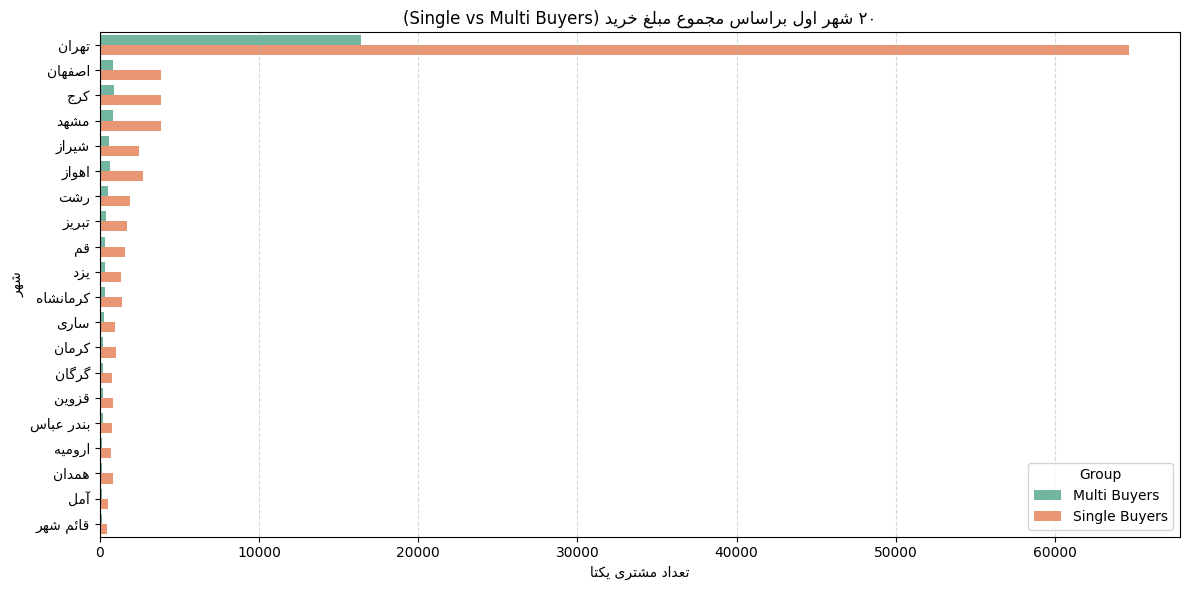

In [38]:
# 1. اتصال اطلاعات مشتری به سفارش‌ها
customer_city_group = orders_df.merge(customer_df[['ID_Customer', 'Group']], on='ID_Customer', how='left')

# 2. محاسبه مجموع مبلغ خرید به ازای شهر
total_amount_by_city = orders_df.groupby('city_name_fa')['Amount_Gross_Order'].sum().sort_values(ascending=False)

# 3. انتخاب ۲۰ شهر برتر براساس مبلغ خرید
top_purchase_cities = total_amount_by_city.head(20).index.tolist()

# 4. فیلتر روی شهرهای برتر
city_group_counts = customer_city_group.groupby(['city_name_fa', 'Group'])['ID_Customer'].nunique().reset_index()
city_group_counts.columns = ['City', 'Group', 'Unique_Customers']
city_group_counts = city_group_counts[city_group_counts['City'].isin(top_purchase_cities)]

# 5. اصلاح فارسی‌سازی نام شهر
city_group_counts['City'] = city_group_counts['City'].apply(fa)

# 6. اعمال ترتیب برای بارچارت
ordered_cities_fa = [fa(city) for city in top_purchase_cities]
city_group_counts['City'] = pd.Categorical(city_group_counts['City'], categories=ordered_cities_fa, ordered=True)

# 7. رسم نمودار نهایی
plt.figure(figsize=(12, 6))
sns.barplot(data=city_group_counts, x='Unique_Customers', y='City', hue='Group', palette='Set2')
plt.title(fa('۲۰ شهر اول براساس مجموع مبلغ خرید (Single vs Multi Buyers)'))
plt.xlabel(fa('تعداد مشتری یکتا'))
plt.ylabel(fa('شهر'))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-39-cb8cf64677dc>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




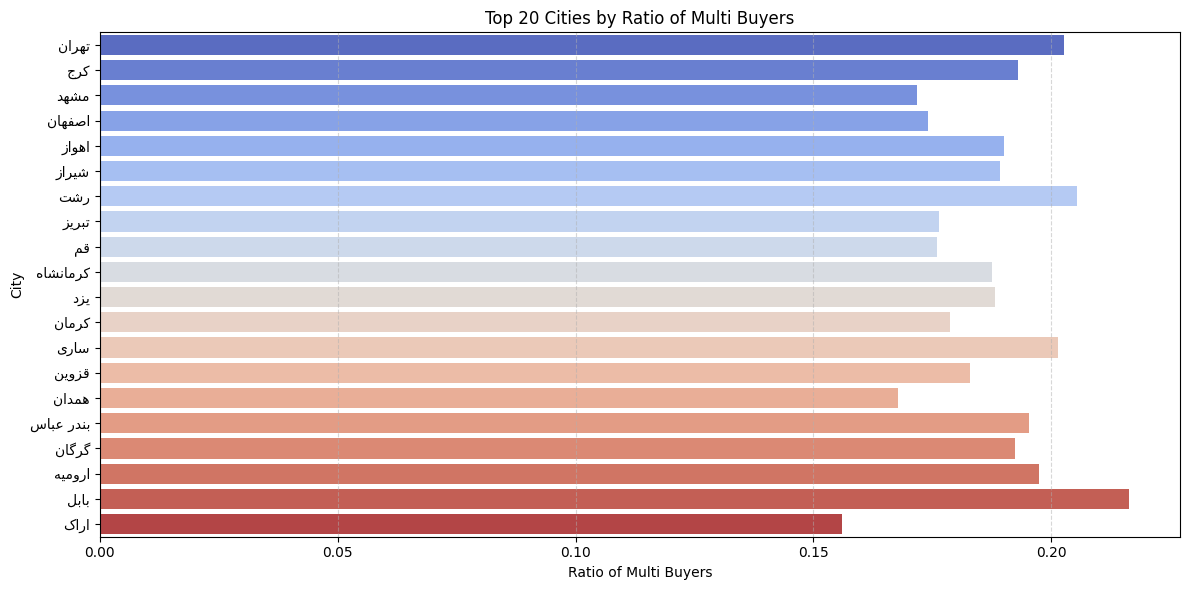

In [39]:
# گام 1: اضافه‌کردن گروه به customer_df
customer_df['Group'] = np.where(customer_df['Frequency'] == 1, 'Single', 'Multi')

# گام 2: join به orders_df برای دسترسی به city_name_fa
customer_city = orders_df[['ID_Customer', 'city_name_fa']].drop_duplicates()
customer_group_city = customer_df[['ID_Customer', 'Group']].merge(customer_city, on='ID_Customer', how='left')

# گام 3: محاسبه تعداد مشتری در هر گروه و شهر
city_group_counts = customer_group_city.groupby(['city_name_fa', 'Group'])['ID_Customer'].nunique().reset_index()
city_group_pivot = city_group_counts.pivot(index='city_name_fa', columns='Group', values='ID_Customer').fillna(0)

# گام 4: محاسبه نسبت مشتریان Multi
city_group_pivot['Total'] = city_group_pivot.sum(axis=1)
city_group_pivot['Multi_Ratio'] = city_group_pivot['Multi'] / city_group_pivot['Total']

# انتخاب 20 شهر با بیشترین مشتری
top_20_by_total = city_group_pivot.sort_values(by='Total', ascending=False).head(20)
top_20_by_total.index = top_20_by_total.index.map(fa)

# گام 5: رسم نمودار
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_by_total['Multi_Ratio'], y=top_20_by_total.index, palette='coolwarm')
plt.title('Top 20 Cities by Ratio of Multi Buyers')
plt.xlabel('Ratio of Multi Buyers')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

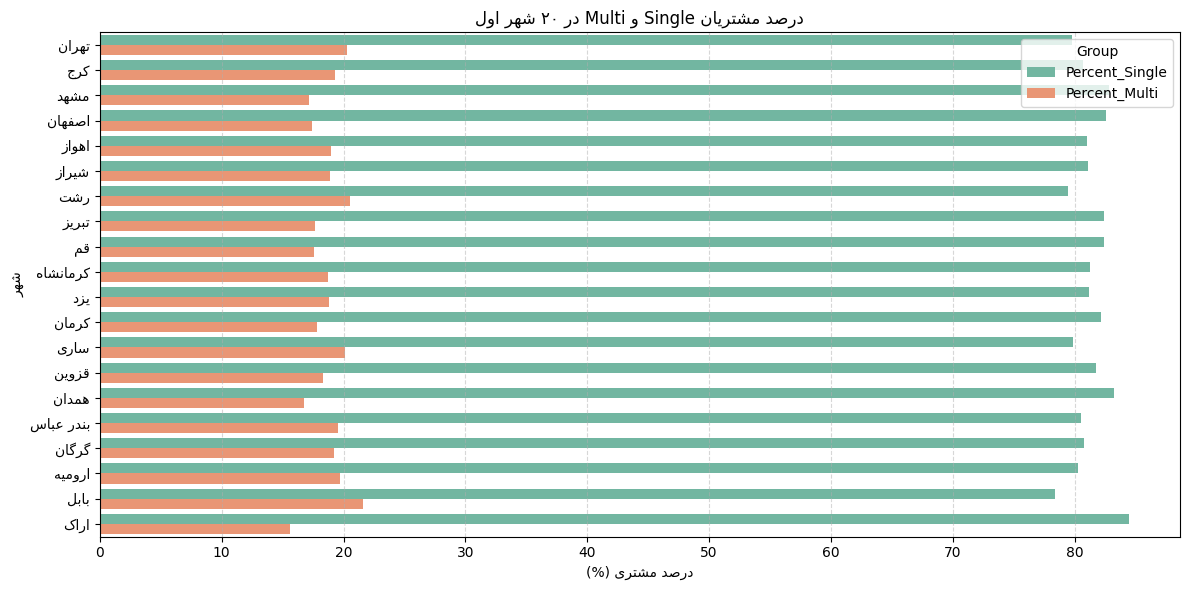

In [40]:
# مرحله 2: گرفتن شهر برای هر مشتری
customer_city = orders_df[['ID_Customer', 'city_name_fa']].drop_duplicates()

# مرحله 3: ادغام گروه و شهر
customer_group_city = customer_df[['ID_Customer', 'Group']].merge(customer_city, on='ID_Customer', how='left')

# مرحله 4: گروه‌بندی و pivot
city_group_counts = customer_group_city.groupby(['city_name_fa', 'Group'])['ID_Customer'].nunique().reset_index()
pivot_df = city_group_counts.pivot(index='city_name_fa', columns='Group', values='ID_Customer').fillna(0)

# مرحله 5: محاسبه درصدها
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df['%Multi'] = (pivot_df['Multi'] / pivot_df['Total']) * 100
pivot_df['%Single'] = (pivot_df['Single'] / pivot_df['Total']) * 100

# مرحله 6: مرتب‌سازی و استخراج ۲۰ شهر اول
pivot_df_sorted = pivot_df.sort_values(by='Total', ascending=False)
final_df = pivot_df_sorted[['Single', 'Multi', '%Single', '%Multi']].head(20)

# اطمینان از نام درست ستون‌ها
final_df = final_df.rename(columns={
    '%Single': 'Percent_Single',
    '%Multi': 'Percent_Multi'
})

# melt درست روی ستون‌های درصدی
melted_df = final_df.reset_index().melt(
    id_vars='city_name_fa',
    value_vars=['Percent_Single', 'Percent_Multi'],
    var_name='Group',
    value_name='Percentage'
)
melted_df['city_name_fa'] = melted_df['city_name_fa'].apply(fa)

# رسم نمودار
plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted_df,
    x='Percentage', y='city_name_fa', hue='Group', palette='Set2'
)
plt.title(fa('درصد مشتریان Single و Multi در ۲۰ شهر اول'))
plt.xlabel(fa('درصد مشتری (%)'))
plt.ylabel(fa('شهر'))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## مقایسه محصولات خریداری‌شده    

<ipython-input-47-b4f0c019cc72>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




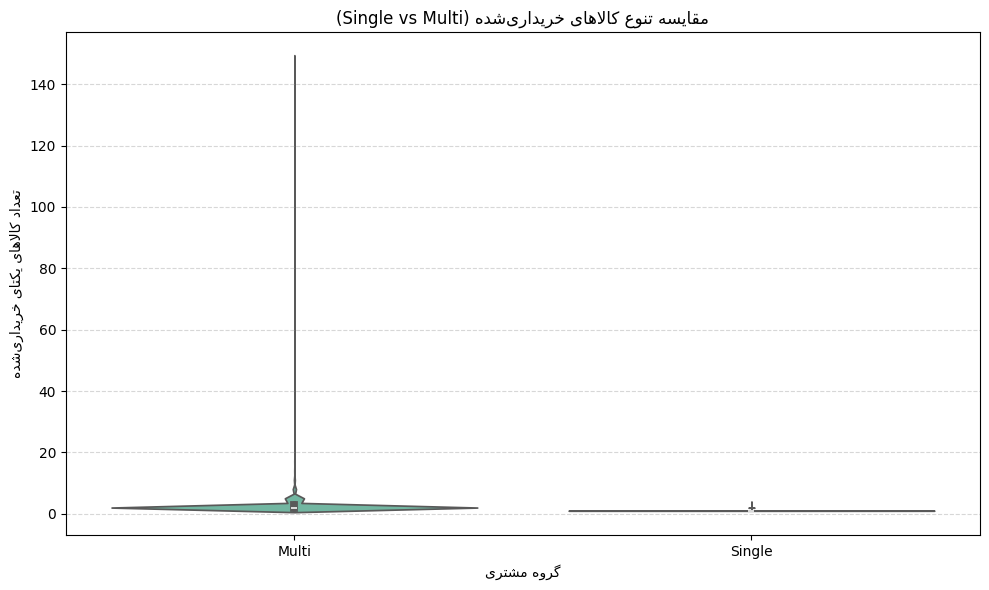

In [47]:
# گام 2: اتصال ID_Customer به order_items_df (از طریق orders_df)
order_items_with_customer = order_items_df.merge(orders_df[['ID_Order', 'ID_Customer']], on='ID_Order', how='left')

# گام 3: محاسبه تعداد کالاهای یکتای خریداری‌شده توسط هر مشتری
item_diversity = order_items_with_customer.groupby('ID_Customer')['ID_Item'].nunique().reset_index()
item_diversity.columns = ['ID_Customer', 'Unique_Items_Purchased']

# گام 4: اتصال تنوع به customer_df برای مقایسه گروه‌ها
customer_with_diversity = customer_df.merge(item_diversity, on='ID_Customer', how='left')

# گام 5: رسم Violin Plot برای مقایسه تنوع خرید
plt.figure(figsize=(10, 6))
sns.violinplot(data=customer_with_diversity, x='Group', y='Unique_Items_Purchased', palette='Set2')
plt.title(fa('مقایسه تنوع کالاهای خریداری‌شده (Single vs Multi)'))
plt.xlabel(fa('گروه مشتری'))
plt.ylabel(fa('تعداد کالاهای یکتای خریداری‌شده'))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-44-edb1cb2d24df>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




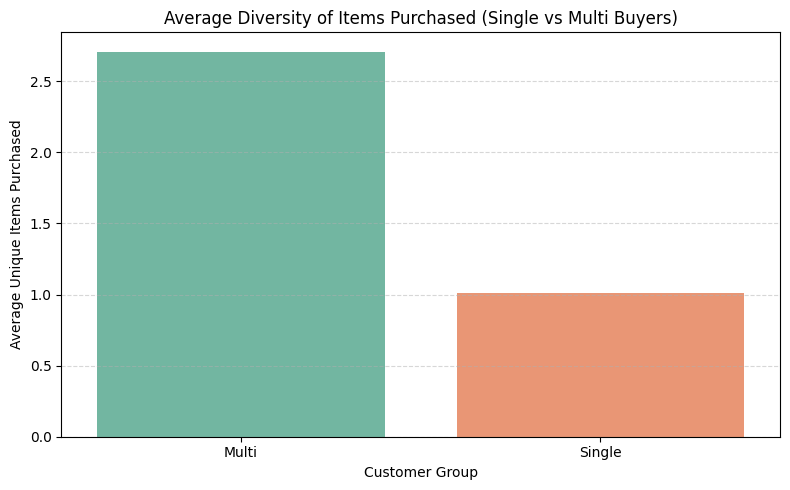

In [44]:
# میانگین تنوع خرید برای هر گروه
avg_diversity = customer_with_diversity.groupby('Group')['Unique_Items_Purchased'].mean().reset_index()

# رسم نمودار بار برای مقایسه میانگین تنوع
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_diversity, x='Group', y='Unique_Items_Purchased', palette='Set2')

plt.title('Average Diversity of Items Purchased (Single vs Multi Buyers)')
plt.xlabel('Customer Group')
plt.ylabel('Average Unique Items Purchased')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [58]:
order_items_with_time

NameError: name 'order_items_with_time' is not defined

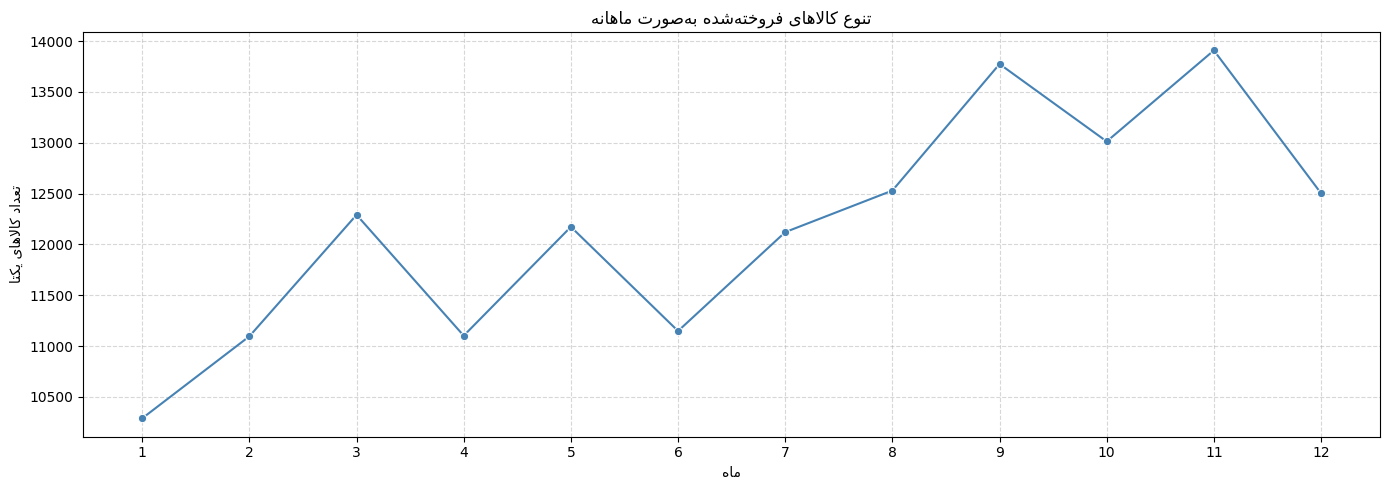

<ipython-input-60-4e721b77cbf0>:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




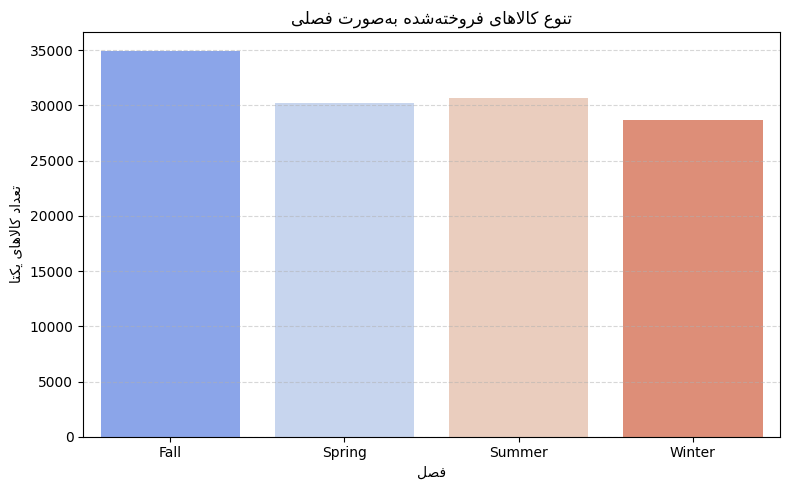

In [60]:
# ساخت جدول شامل ID_Item و تاریخ سفارش
order_items_with_time = order_items_df.merge(
    orders_df[['ID_Order', 'DateTime_CartFinalize', 'Order_Month', 'Order_Season']],
    on='ID_Order', how='left'
)

# افزودن نام فصل
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
order_items_with_time['Season_Name'] = order_items_with_time['Order_Season'].map(season_map)

# محاسبه تنوع کالا در هر ماه
monthly_diversity = order_items_with_time.groupby('Order_Month')['ID_Item'].nunique().reset_index()
monthly_diversity.columns = ['Month', 'Unique_Items_Sold']

# محاسبه تنوع کالا در هر فصل
seasonal_diversity = order_items_with_time.groupby('Season_Name')['ID_Item'].nunique().reset_index()
seasonal_diversity.columns = ['Season', 'Unique_Items_Sold']
seasonal_diversity['Season'] = seasonal_diversity['Season'].apply(fa)

# --- 📈 مصور سازی ---

# نمودار ماهانه
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly_diversity, x='Month', y='Unique_Items_Sold', marker='o', color='steelblue')
plt.title(fa('تنوع کالاهای فروخته‌شده به‌صورت ماهانه'))
plt.xlabel(fa('ماه'))
plt.ylabel(fa('تعداد کالاهای یکتا'))
plt.xticks(monthly_diversity['Month'])  # اطمینان از نمایش همه ماه‌ها
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# نمودار فصلی
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_diversity, x='Season', y='Unique_Items_Sold', palette='coolwarm')
plt.title(fa('تنوع کالاهای فروخته‌شده به‌صورت فصلی'))
plt.xlabel(fa('فصل'))
plt.ylabel(fa('تعداد کالاهای یکتا'))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


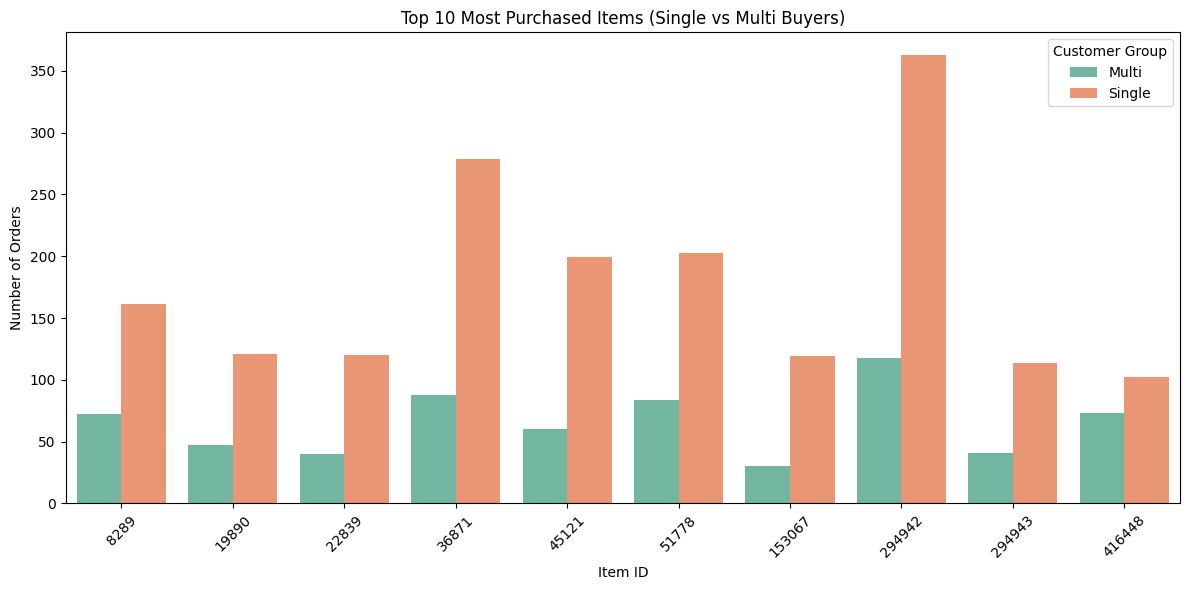

In [63]:
# اتصال گروه مشتری به سفارشات آیتمی
order_items_with_group = order_items_with_customer.merge(customer_df[['ID_Customer', 'Group']], on='ID_Customer', how='left')

# شمارش تعداد سفارش برای هر کالا به تفکیک گروه
popular_items = order_items_with_group.groupby(['ID_Item', 'Group'])['ID_Order'].count().unstack().fillna(0).astype(int)

# مرتب‌سازی برای نمایش
popular_items['Total'] = popular_items.sum(axis=1)
popular_items_sorted = popular_items.sort_values(by='Total', ascending=False)

# تبدیل داده‌ها به فرمت مناسب برای بارگذاری در نمودار
popularity_df = popular_items_sorted.head(10).reset_index()

# ایجاد یک دیتا فریم جدید برای گروه‌بندی کالاها
popularity_df_melted = popularity_df.melt(id_vars='ID_Item', value_vars=['Multi', 'Single'],
                                          var_name='Group', value_name='Order_Count')

# رسم نمودار برای مقایسه کالاها بین Multi و Single
plt.figure(figsize=(12, 6))
sns.barplot(data=popularity_df_melted, x='ID_Item', y='Order_Count', hue='Group', palette='Set2')
plt.title('Top 10 Most Purchased Items (Single vs Multi Buyers)')
plt.xlabel('Item ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Customer Group')
plt.tight_layout()
plt.show()

In [64]:
# تعداد سفارش‌های متفاوت برای هر آیتم توسط یک مشتری
duplicate_items = order_items_with_customer.groupby(['ID_Customer', 'ID_Item'])['ID_Order'].nunique().reset_index()
duplicate_items = duplicate_items[duplicate_items['ID_Order'] > 1]
print(duplicate_items.head())

      ID_Customer  ID_Item  ID_Order
1760       478029   176000         2
4742       504753    51778         2
5281       509634    31619         2
5304       509634   294942         2
6879       522308    34782         2
